In [1]:
import numpy as np 
import pandas as pd 
import re  # search pattern in string ( text) 
import nltk # nlp 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os 
os.chdir(r"C:\Users\GENIUS\Desktop\Batch 31 ML\Deep Learning\Practice\Boycot")

In [6]:
boycot=pd.read_csv(r"Boycot.csv")

In [7]:
boycot.shape

(1000, 10)

In [8]:
boycot.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,Jitendr70515197,NaN,Twitter for Android,NaN,2022-08-17 08:20:37,False,56,Boycott forever not only arjun kapoor but whol...,0,False
1,AgrahriNikhil,ofcourse its a Dark World,Twitter for Android,NaN,2022-08-17 08:20:18,False,269,@SumitkadeI @taapsee 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,0,False
2,itsnorthen_z,Planet Earth 🌍,Twitter for iPhone,NaN,2022-08-17 08:19:52,True,30,@AMIT_GUJJU We will #BoycottbollywoodForever w...,0,False
3,IND_Rhms,उत्तर प्रदेश भारत,Twitter for Android,NaN,2022-08-17 08:19:43,False,58,Boycott the hypocrite Bollywood #BoycottPathan...,0,False
4,Varunpratap1910,Union of India,Twitter for Android,NaN,2022-08-17 08:18:27,False,764,Agreed #BoycottbollywoodForever,0,False


In [9]:
data=pd.DataFrame(boycot.text)
data.head()

,text
0,Boycott forever not only arjun kapoor but whol...
1,@SumitkadeI @taapsee 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...
2,@AMIT_GUJJU We will #BoycottbollywoodForever w...
3,Boycott the hypocrite Bollywood #BoycottPathan...
4,Agreed #BoycottbollywoodForever


In [10]:
data.iloc[175,0]

"#ArjunKapoor just one question? You have been silent for so long, Ok. What you'll do next if we keep you boycotting… https://t.co/H6tZnpIFgS"

In [11]:
data.iloc[174,0]

'Arjun Kapoor statement shows what is wrong with Bollywood celebs mindset. You don’t have original ideas, good stori… https://t.co/QhBkHDs9kZ'

# Converted to Lower 

In [12]:
data.text=data.text.str.lower()

In [13]:
data.iloc[174,0]

'arjun kapoor statement shows what is wrong with bollywood celebs mindset. you don’t have original ideas, good stori… https://t.co/qhbkhds9kz'

In [14]:
data.iloc[175,0]

"#arjunkapoor just one question? you have been silent for so long, ok. what you'll do next if we keep you boycotting… https://t.co/h6tznpifgs"

# Removing Url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [15]:
data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[175,0]

C:\Users\GENIUS\AppData\Local\Temp/ipykernel_13308/3450269025.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)


"#arjunkapoor just one question? you have been silent for so long, ok. what you'll do next if we keep you boycotting… "

# Remove punctuation

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuation(text):
    text_nopunt="".join([c 
                         for c in text
                         if c not in string.punctuation])
    return text_nopunt

In [19]:
data['text']=data['text'].apply(lambda x : remove_punctuation(x))

In [20]:
data.iloc[175,0]

'arjunkapoor just one question you have been silent for so long ok what youll do next if we keep you boycotting… '

In [21]:
data.iloc[174,0]

'arjun kapoor statement shows what is wrong with bollywood celebs mindset you don’t have original ideas good stori… '

# Remove Number

In [22]:
data.iloc[175,0]

'arjunkapoor just one question you have been silent for so long ok what youll do next if we keep you boycotting… '

In [23]:
data.iloc[174,0]

'arjun kapoor statement shows what is wrong with bollywood celebs mindset you don’t have original ideas good stori… '

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [24]:
data['text'] = data['text'].str.replace('\d+', '')

C:\Users\GENIUS\AppData\Local\Temp/ipykernel_13308/125446536.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('\d+', '')


In [25]:
data.iloc[174,0]

'arjun kapoor statement shows what is wrong with bollywood celebs mindset you don’t have original ideas good stori… '

# Removing Stop Words

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [29]:
#import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [30]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
data.iloc[174,0]

'arjun kapoor statement shows what is wrong with bollywood celebs mindset you don’t have original ideas good stori… '

In [32]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['text'] = data['text'].apply(lambda x: ' '.join([word 
                                                      for word in x.split() 
                                                      if word not in (stop)]))

In [33]:
data.iloc[174,0]

'arjun kapoor statement shows wrong bollywood celebs mindset don’t original ideas good stori…'

# Common Words

In [34]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\GENIUS\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'allayment',
 'moorpan',
 'penaeaceous',
 'trivvet',
 'gamestress',
 'jaculation',
 'preadmit',
 'unbudgeability',
 'periaxial',
 'tachygraphic',
 'Waler',
 'evulgation',
 'advise',
 'unresistant',
 'unlittered',
 'bitterish',
 'fermentability',
 'childhood',
 'Seaforthia',
 'copywise',
 'houselet',
 'ectorhinal',
 'redistrain',
 'carchariid',
 'nonmenial',
 'flashlike',
 'conservator',
 'Docetae',
 'mastomenia',
 'abrasive',
 'overeagerly',
 'glaciologist',
 'pish',
 'superimpersonal',
 'actinostomal',
 'tanach',
 'boll',
 'chondroseptum',
 'sikhara',
 'attendantly',
 'Ladino',
 'creedmore',
 'stagnantly',
 'telescopy',
 'cowleech',
 'anandrous',
 'particular',
 'precomradeship',
 'biphenylene',
 'Pterichthyodes',
 'sugary',
 'overjealous',
 'unacquaintance',
 'Raskolnik',
 'kabel',
 'uncurtailed',
 'articulate',
 'procellarian',
 'noncongruent',
 'adawe',
 'consociation',
 'blepharochalasis',
 'enrut',
 'physiotherapy',
 'sophomoric',
 'workmanlikeness',
 'parencephalon',
 'carangoi

In [35]:
text=data.text[3]
text

'boycott hypocrite bollywood boycottpathanmovie boycottbollywoodforever'

In [56]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('boycott', '', text)#remove telegram
    text =  re.sub('watch','', text) #remove eight
    text =  re.sub('make','', text)
    text =  re.sub('like','', text)
    text =  re.sub('new','', text)
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad 
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                    if w.lower() in words)  #    
    return text

round2 = lambda x: clean_text_round2(x)

In [57]:
data.iloc[174,0]

'arjun statement wrong don original good'

In [58]:
# Let's take a look at the updated text
data = pd.DataFrame(data.text.apply(round2))
data.iloc[174,0]

'arjun statement wrong don original good'

# Lemmatization

In [59]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GENIUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") ## v = verb  
            for w in w_tokenizer.tokenize(text)]  # word tokenizer

In [61]:
data['text'] = data.text.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[174,0]

'arjun statement wrong don original good'

# Strip extra whitespace

In [62]:
data.iloc[22,0]

'arjun get public sub standard'

In [63]:
data['text'] = (data['text'].astype("str").str.rstrip())
data.iloc[22,0]

'arjun get public sub standard'

* Finished Data Pre-Processing or Data Cleaning

### Document-Term Matrix

For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [64]:
data.head()

,text
0,forever arjun whole
1,dont deserve
2,way don deserve even
3,hypocrite
4,agree


In [65]:
data.text[22]

'arjun get public sub standard'

In [66]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
data_cv = cv.fit_transform(data.text)  # Term & Count
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # document term matrix

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm

C:\Users\GENIUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yep,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yesterday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,freq
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
accuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [68]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,freq
0,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,abb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,accept,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,accuse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [69]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

C:\Users\GENIUS\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\GENIUS\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Word,freq
747,real,86
626,movie,74
53,arjun,69
446,hero,60
679,people,55
...,...,...
630,mustnt,1
631,mythological,1
248,debate,1
633,naked,1


# Barplot 

In [70]:
tdm1.head(10)

,Word,freq
747,real,86
626,movie,74
53,arjun,69
446,hero,60
679,people,55
1062,zero,54
891,stop,47
391,forever,46
642,need,37
296,dont,35


In [71]:
w = tdm1[tdm1['freq'] >50]
w    

,Word,freq
747,real,86
626,movie,74
53,arjun,69
446,hero,60
679,people,55
1062,zero,54


C:\Users\GENIUS\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\GENIUS\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


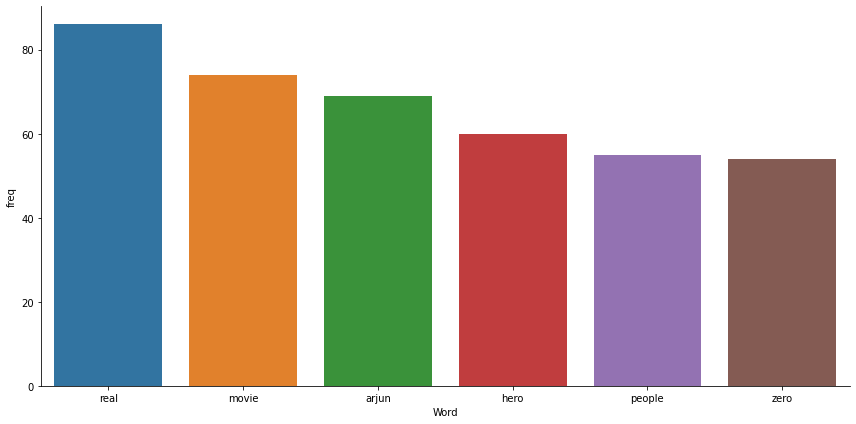

In [72]:
import seaborn as sns
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [73]:
text=data.text[3]
text

'hypocrite'

In [74]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 23886 words in the combination of all review.


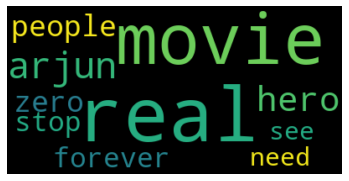

In [75]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      collocations=False,
                       max_words=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Cloud Wordcloud

In [76]:
import os 
os.chdir(r"C:\Users\GENIUS\Desktop\Batch 31 ML") 

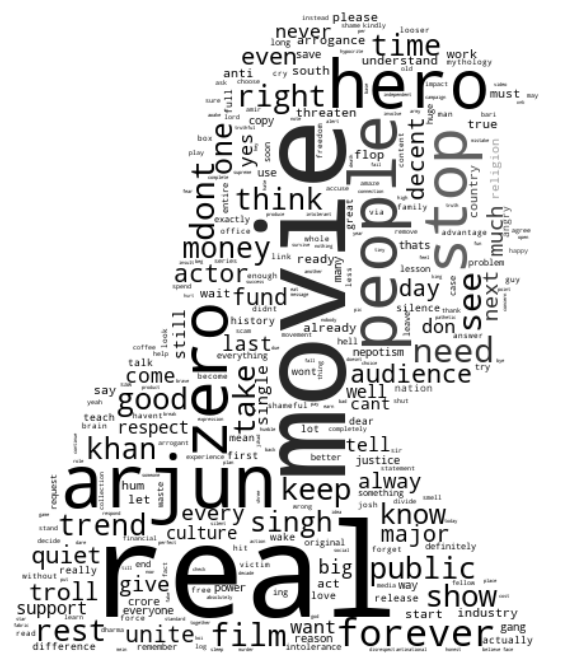

In [77]:
# Generate a word cloud image

from PIL import Image

mask = np.array(Image.open("3.png")) # pixel number
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='white',
                           mode="RGBA", # combination of colour
                           max_words=27000, 
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

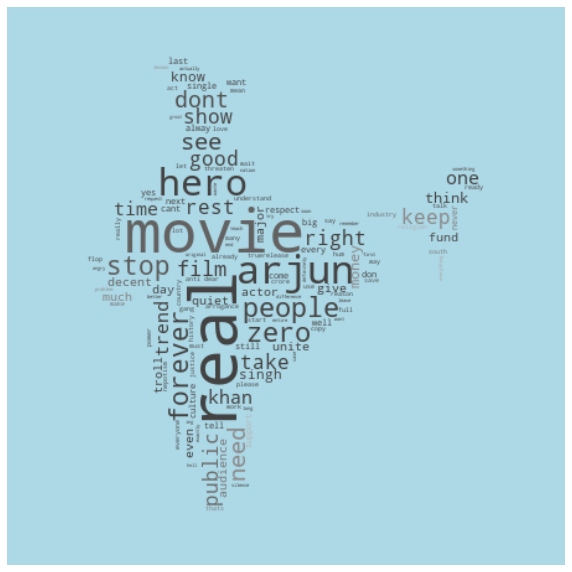

In [78]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("map.png"))
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='LightBlue',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

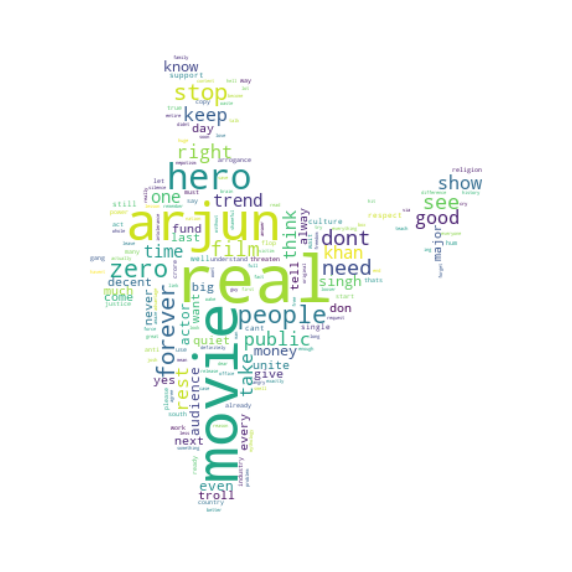

In [79]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("map.png"))
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='white',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()

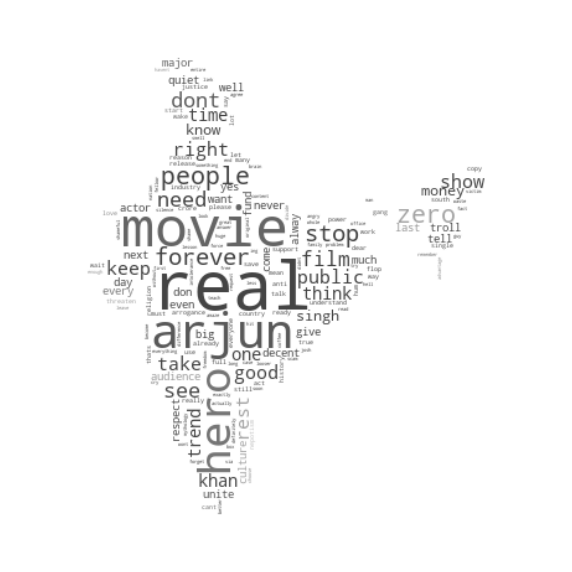

In [80]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("map.png"))
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='white',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

# Finish